In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from nltk.tokenize import TweetTokenizer
from sklearn.impute import SimpleImputer
import re
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/Data_challenge"


/content/drive/MyDrive/Data_challenge


In [ ]:
#call in the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
train_data.shape

(15000, 10)

In [ ]:
test_data.shape

(8000, 9)

In [ ]:
train_data.head()

,ID,comment,date,down,parent_comment,score,top,topic,user,label
0,uid_590555,"Well, let's be honest here, they don't actuall...",2015-04,0,They should shut the fuck up and let the commu...,2,2,starcitizen,Combat_Wombatz,0
1,uid_671762,"Well, I didn't need evidence to believe in com...",2016-12,-1,You need evidence to kill people? I thought we...,6,-1,EnoughCommieSpam,starkadd,1
2,uid_519689,"Who does an ""official promo"" in 360p?",2013-11,0,2014 BMW S1000R: Official Promo,3,3,motorcycles,phybere,0
3,uid_788362,Grotto koth was the best,2015-09,0,Not really that memorable lol if you want memo...,2,2,hcfactions,m0xyMC,1
4,uid_299252,Neal's back baby,2015-11,0,James Neal hit on Zach Parise,-5,-5,hockey,Somuch101,1


In [ ]:
train_data['parent_comment'][700] in train_data['comment'] #random check if parent comment is in comment

False

In [ ]:
train_data.sample(5)

,ID,comment,date,down,parent_comment,score,top,topic,user,label
2758,uid_612216,You're going to be ripped!,2015-07,0,I'll take the one way ticket to Diabetes please,1,1,AdviceAnimals,crybllrd,1
8014,uid_934173,That's stretching it a bit... Depends on what ...,2015-09,0,So is $20 your low?,2,2,cringepics,AssholeReportingSir,0
6455,uid_756707,"Well excuse me, how dare you bring logic into ...",2016-08,0,"I agree with nothing this asswipe is saying, b...",20,20,niceguys,yizhimeil,1
7710,uid_251523,Well they are only holding him on the copyrigh...,2015-06,0,Soooo... Dude's been locked up in Supermax und...,1,1,todayilearned,OldirtySapper,1
10064,uid_297883,"That sounds reasonable, why cant these darn yo...",2015-03,0,0 is the legal limit when youre driving on a G...,1,1,Calgary,rocket_robin_hood,1


In [ ]:
test_data.head()

,ID,comment,date,down,parent_comment,score,top,topic,user
0,uid_764784,Meanwhile if I pick my boxer up to move him to...,2016-01,0,Part of the Family Fun,2,2,gifs,Cameltoe-Swampdonkey
1,uid_67552,Thats what you get for using an unfair advanta...,2015-03,0,received a warning for hacking while overclock...,1,1,h1z1,Gothika_47
2,uid_240490,only to be later faced with thousands of dolla...,2010-09,0,Running shoes and race entries. I started runn...,1,1,Frugal,tells
3,uid_56568,What a thoughtful rebuttal to a well articulat...,2015-12,0,"Actually, you should get over your self. There...",-1,-1,CFB,YourToothbrush
4,uid_875860,"Yes, major life experiences that demand a grea...",2014-04,0,"As a bonus, it was with his ex, months after t...",-5,-5,AdviceAnimals,drunken_trophy_wife


Basic Exploratory Data Analysis


In [ ]:
#info of train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              15000 non-null  object
 1   comment         15000 non-null  object
 2   date            15000 non-null  object
 3   down            15000 non-null  int64 
 4   parent_comment  15000 non-null  object
 5   score           15000 non-null  int64 
 6   top             15000 non-null  int64 
 7   topic           15000 non-null  object
 8   user            15000 non-null  object
 9   label           15000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 1.1+ MB


In [ ]:
#info of test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              8000 non-null   object
 1   comment         8000 non-null   object
 2   date            8000 non-null   object
 3   down            8000 non-null   int64 
 4   parent_comment  8000 non-null   object
 5   score           8000 non-null   int64 
 6   top             8000 non-null   int64 
 7   topic           8000 non-null   object
 8   user            8000 non-null   object
dtypes: int64(3), object(6)
memory usage: 562.6+ KB


In [ ]:
#the output class is balanced
['label'].value_counts()

1    7527
0    7473
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


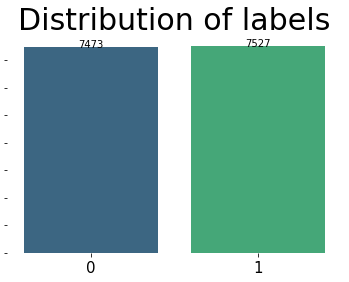

In [ ]:
#the output class is balanced: visualization

import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
g = sns.countplot(train_data.label, palette='viridis')  #make changes here
g.set_xticklabels(['0','1'])
g.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of labels', fontsize=30) #make changes here for title
plt.tick_params(axis='x', which='major', labelsize=15)
fig.savefig('classes.png')
plt.show()

In [ ]:
#check unique types with a columns of the entire dataset
def unique_types(df):
  cols = {}
  for i in df.columns:
    cols[i]=set(df[i].map(type))
  return cols

In [ ]:
unique_types(train_data)

{'ID': {str},
 'comment': {str},
 'date': {str},
 'down': {int},
 'label': {int},
 'parent_comment': {str},
 'score': {int},
 'top': {int},
 'topic': {str},
 'user': {str}}

In [ ]:
unique_types(test_data)

{'ID': {str},
 'comment': {str},
 'date': {str},
 'down': {int},
 'parent_comment': {str},
 'score': {int},
 'top': {int},
 'topic': {str},
 'user': {str}}

In [ ]:
#check missing values of entire dataset
def missing_value_of_data(data):
    total=data.isnull().sum().sort_values(ascending=False)
    percentage=round(total/data.shape[0]*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [ ]:
missing_value_of_data(train_data) #no missing data in training set

,Total,Percentage
label,0,0.0
user,0,0.0
topic,0,0.0
top,0,0.0
score,0,0.0
parent_comment,0,0.0
down,0,0.0
date,0,0.0
comment,0,0.0
ID,0,0.0


In [ ]:
missing_value_of_data(test_data) #no missing data in test set

,Total,Percentage
user,0,0.0
topic,0,0.0
top,0,0.0
score,0,0.0
parent_comment,0,0.0
down,0,0.0
date,0,0.0
comment,0,0.0
ID,0,0.0


In [ ]:
#function to check unique values in a column
def unique_values_in_column(data,feature):
    unique_val=pd.Series(data.loc[:,feature].unique())
    return pd.concat([unique_val],axis=1,keys=['Unique Values'])

In [ ]:
print(unique_values_in_column(train_data,'parent_comment'))  #checking the unique parents

                                           Unique Values
0      They should shut the fuck up and let the commu...
1      You need evidence to kill people? I thought we...
2                        2014 BMW S1000R: Official Promo
3      Not really that memorable lol if you want memo...
4                          James Neal hit on Zach Parise
...                                                  ...
14966  There's two things you don't do in Florida. - ...
14967  Sounds like a pretty good overall summary of o...
14968  I know the type you speak of. The "die cis scu...
14969  That there's A hidden cure for cancer but phar...
14970  Windows 8(x) had more polish on launch than 10...

[14971 rows x 1 columns]


In [ ]:
print(unique_values_in_column(train_data,'user'))  #checking the unique users

        Unique Values
0      Combat_Wombatz
1            starkadd
2             phybere
3              m0xyMC
4           Somuch101
...               ...
13989   BlackDragon09
13990     shutupisaac
13991           em483
13992        OhHiGCHQ
13993     thedonutman

[13994 rows x 1 columns]


In [ ]:
user_label=pd.crosstab(train_data.user, train_data.label).apply(lambda r: round(r/r.sum() * 100, 2),axis=1).reset_index()

In [ ]:
user_label.sort_values(by=1, ascending=False).head(10)  #checking to see if a particular user's comment is sarcastic or not

label,user,0,1
6997,This_isR2Me,0.0,100.0
11101,mebob85,0.0,100.0
5825,SH4RPSH00T3R,0.0,100.0
5823,SEND_DICK_PIC,0.0,100.0
5821,SCRIZZLEnetwork,0.0,100.0
5820,SCREAMBLOODYGORE,0.0,100.0
11106,meddlingbarista,0.0,100.0
5817,SAGNUTZ,0.0,100.0
11108,mediocre_sophist,0.0,100.0
5815,SABIIIN,0.0,100.0


In [ ]:
print(unique_values_in_column(train_data,'topic')) #checking the unique topics


         Unique Values
0          starcitizen
1     EnoughCommieSpam
2          motorcycles
3           hcfactions
4               hockey
...                ...
2267           iOSBeta
2268        indieheads
2269  askashittydoctor
2270       lyftdrivers
2271       FNaFAnarchy

[2272 rows x 1 columns]


In [ ]:
print(unique_values_in_column(train_data,'down')) #checking the unique downs


   Unique Values
0              0
1             -1


In [ ]:
print(unique_values_in_column(train_data,'score')) #checking the unique scores

     Unique Values
0                2
1                6
2                3
3               -5
4                8
..             ...
236            162
237            128
238            255
239            -22
240            -53

[241 rows x 1 columns]


In [ ]:
print(unique_values_in_column(train_data,'top')) #checking the unique top

     Unique Values
0                2
1               -1
2                3
3               -5
4                8
..             ...
212            153
213            162
214            128
215            255
216            -22

[217 rows x 1 columns]


In [ ]:
#basic statistics of the dataset
train_data.describe()

,down,score,top,label
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,-0.145333,7.194667,5.457600,0.501800
std,0.352448,46.586034,32.236574,0.500013
min,-1.000000,-111.000000,-111.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,2.000000,1.000000,1.000000
75%,0.000000,4.000000,3.000000,1.000000
max,0.000000,2993.000000,1340.000000,1.000000


In [ ]:
#Converting data column as date type

train_data['date']=pd.to_datetime(train_data['date'])
test_data['date']=pd.to_datetime(test_data['date'])

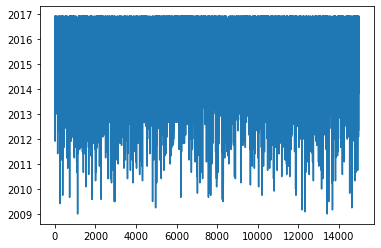

In [ ]:
train_data['date'].plot() #train dates overlap with test dates

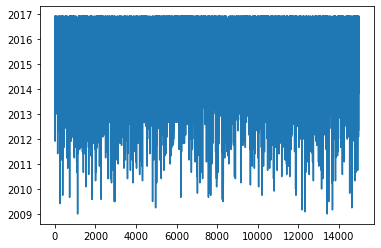

In [ ]:
train_data['date'].plot() #train dates overlap with test dates

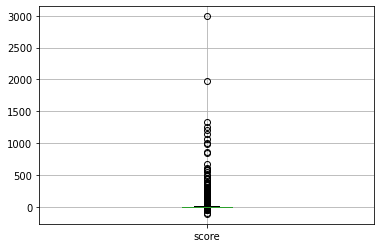

In [ ]:
train_data.boxplot(column=['score']) # checking for outliers in score column

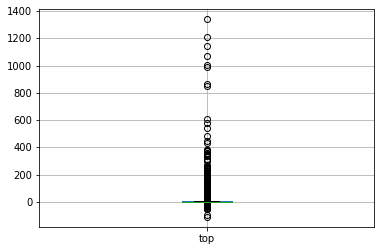

In [ ]:
train_data.boxplot(column=['top']) # checking for outliers in top column

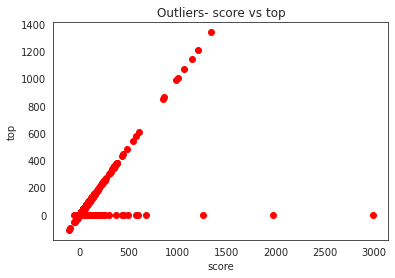

In [ ]:
plt.title('Outliers- score vs top')
plt.xlabel('score')
plt.ylabel('top')
plt.scatter(train_data['score'],train_data['top'], color= 'red')

In [ ]:
# Not removing any outliers as the supervised learning approach used is not much affected by them

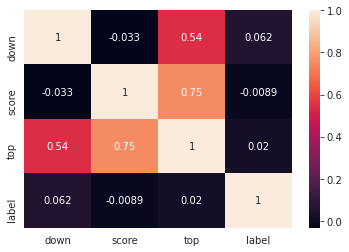

In [ ]:
#Check multicollinearity within the train dataset, which does not seem to be the probelm

corr = train_data.corr(method = 'spearman')
sns.heatmap(corr,annot = True)

In [ ]:
train_data['text_combined'] =  train_data['comment'] + ' ' + train_data['parent_comment'] #combining both comments

In [ ]:
test_data['text_combined'] =  test_data['comment'] + ' ' + test_data['parent_comment'] #combining both comments

Preprocessing the data

In [ ]:
#Preprocessing text data with nltk
#Remove punctuation
import string
def remove_punct(text):
  text_nopunct = "".join([char.lower() for char in text if char not in string.punctuation]) #it was discard all punctuations 
  return text_nopunct.strip()

#Tokenization
def tokenize(text):
  tokens=re.split('\W+',text)
  return tokens

nltk.download('stopwords')
stop_words = stopwords.words('english')
#Remove stopwords
def remove_stopwords(tokenized_list):
  text = [word for word in tokenized_list if word not in stop_words]
  return text

#Preprocessing Data: Lemmatizing
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return " ".join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
train_data['text_wo_punct']=train_data['text_combined'].apply(lambda x: remove_punct(x))
train_data['tokenized']=train_data['text_wo_punct'].apply(lambda x: tokenize(x))
train_data['tokenized_removedsw']=train_data['tokenized'].apply(lambda x: remove_stopwords(x))
train_data['lemmatised']= train_data['tokenized_removedsw'].apply(lambda x: lemmatizing(x))

In [ ]:
test_data['text_wo_punct']=test_data['text_combined'].apply(lambda x: remove_punct(x))
test_data['tokenized']=test_data['text_wo_punct'].apply(lambda x: tokenize(x))
test_data['tokenized_removedsw']=test_data['tokenized'].apply(lambda x: remove_stopwords(x))
test_data['lemmatised']= test_data['tokenized_removedsw'].apply(lambda x: lemmatizing(x))

In [ ]:
#random check to see if preprocessing worked on train data

print(train_data['text_combined'][0])
print(train_data['text_wo_punct'][0])
print(train_data['tokenized'][0])
print(train_data['tokenized_removedsw'][0])
print(train_data['lemmatised'][0])

Well, let's be honest here, they don't actually seem to do much moderating, so they have to spend their time doing *something*.
well lets be honest here they dont actually seem to do much moderating so they have to spend their time doing something
['well', 'lets', 'be', 'honest', 'here', 'they', 'dont', 'actually', 'seem', 'to', 'do', 'much', 'moderating', 'so', 'they', 'have', 'to', 'spend', 'their', 'time', 'doing', 'something']
['well', 'lets', 'honest', 'dont', 'actually', 'seem', 'much', 'moderating', 'spend', 'time', 'something']
well let honest dont actually seem much moderating spend time something


In [ ]:
#random check to see if preprocessing worked on test data
print(test_data['text_combined'][0])
print(test_data['text_wo_punct'][0])
print(test_data['tokenized'][0])
print(test_data['tokenized_removedsw'][0])
print(test_data['lemmatised'][0])

Meanwhile if I pick my boxer up to move him to other side of me on the couch, he flips and twists like I'm using a cattle prod on his nut-sack. Part of the Family Fun
meanwhile if i pick my boxer up to move him to other side of me on the couch he flips and twists like im using a cattle prod on his nutsack part of the family fun
['meanwhile', 'if', 'i', 'pick', 'my', 'boxer', 'up', 'to', 'move', 'him', 'to', 'other', 'side', 'of', 'me', 'on', 'the', 'couch', 'he', 'flips', 'and', 'twists', 'like', 'im', 'using', 'a', 'cattle', 'prod', 'on', 'his', 'nutsack', 'part', 'of', 'the', 'family', 'fun']
['meanwhile', 'pick', 'boxer', 'move', 'side', 'couch', 'flips', 'twists', 'like', 'im', 'using', 'cattle', 'prod', 'nutsack', 'part', 'family', 'fun']
meanwhile pick boxer move side couch flip twist like im using cattle prod nutsack part family fun


In [ ]:
#getting list of unique topics from train and test dataset

train_topic_uni=list(train_data['topic'].unique())
test_topic_uni = list(test_data['topic'].unique())

#finding topics that are not in train but in test
only_test = list(np.setdiff1d(test_topic_uni,train_topic_uni))
#and vice-versa
only_train = list(np.setdiff1d(train_topic_uni,test_topic_uni))




In [ ]:
#taking non-text features of down, top and score

add_feat_train = train_data[['down','top','score']]

#one hot encoding of topics in train set and adding additional topics that are in test set
df_cat_var_train = pd.get_dummies(train_data['topic'], drop_first = True)
for i in only_test:
  df_cat_var_train[i]=0

out_feat_train=pd.concat([add_feat_train,df_cat_var_train], axis=1)



In [ ]:
#sort so that the order of topics in both the dataset is fixed
lst_train= out_feat_train.columns.tolist()
lst_train.sort()
lst_train

out_feat_train = out_feat_train.reindex(columns=lst_train)

In [ ]:
#taking non-text features of down, top and score
add_feat_test = test_data[['down','top','score']]
#one hot encoding of topics in test set and adding additional topics that are in train set
df_cat_var_test = pd.get_dummies(test_data['topic'], drop_first = True)
for i in only_train:
  df_cat_var_test[i]=0
out_feat_test=pd.concat([add_feat_test,df_cat_var_test], axis=1)

out_feat_test.shape

(8000, 2798)

In [ ]:
#sort so that the order of topics in both the dataset is fixed
lst_test= out_feat_test.columns.tolist()
lst_test.sort()
lst_test

out_feat_test = out_feat_test.reindex(columns=lst_test)

In [ ]:
from scipy.sparse import csr_matrix, hstack
#converting into sparse matrix

train_feat_sp=csr_matrix(out_feat_train.values)
test_feat_sp=csr_matrix(out_feat_test.values)



Machine Learning Model


In [ ]:
#seperate train and test datasets are given
#using TF-IDF to vectorise our text data
from sklearn.feature_extraction.text import TfidfVectorizer
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train = train_data["text_combined"].tolist()
X_test = test_data["text_combined"].tolist()
y_train = train_data["label"].tolist()
#y_test = test_data["overall"].tolist() #>>>>>>>>> outcome labels not given in the test dataset


X_train_tfidf, tfidf_vectorizer = tfidf(X_train) #vectorized the train text
X_test_tfidf = tfidf_vectorizer.transform(X_test) #vectorized the test text

In [ ]:
#combining text and non-text data
tot_train=hstack([X_train_tfidf,train_feat_sp])
tot_test=hstack([X_test_tfidf,test_feat_sp])
print(tot_train.shape, tot_test.shape)

(15000, 34983) (8000, 34983)


In [ ]:
#running a grid search for hyperparameter for random forest machine learning model

from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
param = {'max_depth': [90,120,150,200],
         'max_features': ['log2','sqrt']}

gs = GridSearchCV(rf, param, cv=3, n_jobs=-1)  #n_jobs=-1 for paralelizing search
gs_fit = gs.fit(tot_train,y_train)
grid_result=pd.DataFrame(gs_fit.cv_results_).sort_values("mean_test_score", ascending=False).head()

In [ ]:
#top result of grid search
grid_result.params.iloc[0]

{'max_depth': 150, 'max_features': 'sqrt'}

In [ ]:
#Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=200,max_depth=150,max_features='sqrt',random_state=123)

#define the model
model_rf.fit(tot_train,y_train)

#test the model on train data
y_predicted_counts = model_rf.predict(tot_test)

In [ ]:
#build the final submission dataframe that needs to be exported
submit = pd.DataFrame(list(zip(test_data['ID'],y_predicted_counts)),columns=["ID","label"])

In [ ]:
submit.head()

,ID,label
0,uid_764784,0
1,uid_67552,0
2,uid_240490,0
3,uid_56568,1
4,uid_875860,1


In [ ]:
#exporting final dataframe to be submitted
submit.to_csv("sample_submissions.csv", index=False)